## import required packages

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## load the data

In [78]:
df = pd.read_csv('./East_std.csv')

## Exploratory Data Analysis

In [79]:
df.head()

,Unnamed: 0,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         3999 non-null   int64  
 1   Balance            3999 non-null   float64
 2   Qual_miles         3999 non-null   float64
 3   cc1_miles          3999 non-null   float64
 4   cc2_miles          3999 non-null   float64
 5   cc3_miles          3999 non-null   float64
 6   Bonus_miles        3999 non-null   float64
 7   Bonus_trans        3999 non-null   float64
 8   Flight_miles_12mo  3999 non-null   float64
 9   Flight_trans_12    3999 non-null   float64
 10  Days_since_enroll  3999 non-null   float64
 11  Award?             3999 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 375.0 KB


In [81]:
df.describe()

,Unnamed: 0,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000
mean,1999.000000,0.043172,0.012927,0.264879,0.007252,0.003063,0.065020,0.134906,0.014929,0.025917,0.496330,0.370343
std,1154.556192,0.059112,0.069399,0.344230,0.073825,0.048810,0.091590,0.111672,0.045436,0.071569,0.248991,0.482957
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,999.500000,0.010868,0.000000,0.000000,0.000000,0.000000,0.004741,0.034884,0.000000,0.000000,0.280685,0.000000
50%,1999.000000,0.025279,0.000000,0.000000,0.000000,0.000000,0.027195,0.139535,0.000000,0.000000,0.493610,0.000000
75%,2998.500000,0.054201,0.000000,0.500000,0.000000,0.000000,0.090261,0.197674,0.010092,0.018868,0.697914,1.000000
max,3998.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Pre-processing

In [82]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [83]:
df.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?'],
      dtype='object')

## Create hierarchical clusters

In [84]:
from scipy.cluster import hierarchy

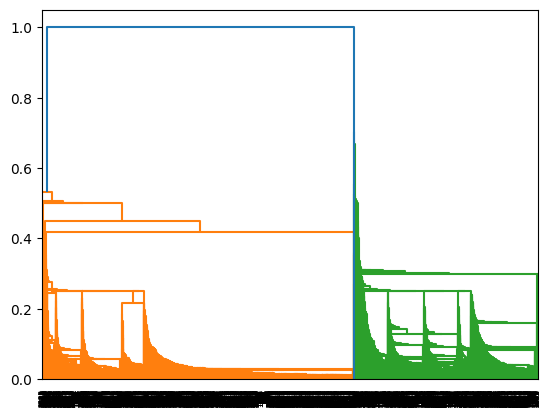

In [85]:
linkage = hierarchy.linkage(df, 'single')
clusters_info = hierarchy.dendrogram(linkage)

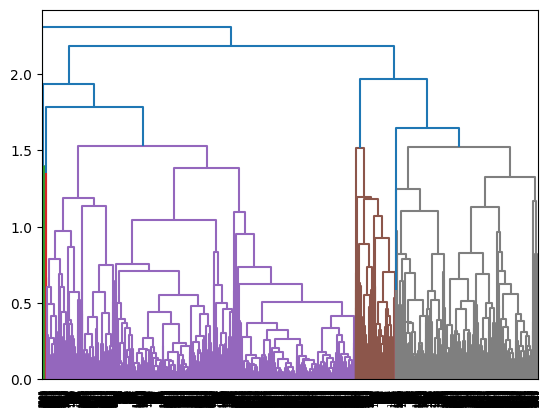

In [86]:
linkage = hierarchy.linkage(df, 'complete')
clusters_info = hierarchy.dendrogram(linkage)

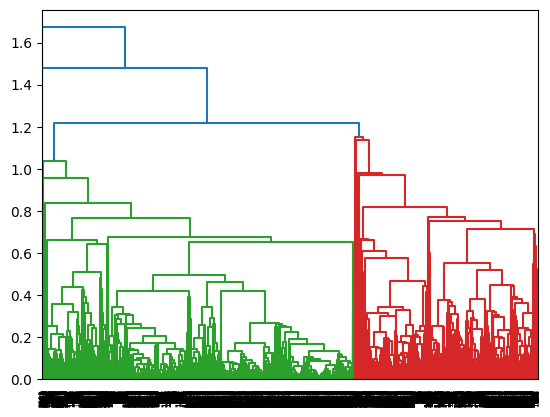

In [87]:
linkage = hierarchy.linkage(df, 'average')
clusters_info = hierarchy.dendrogram(linkage)

## using Sci-Kit Learn

In [88]:
from sklearn.cluster import AgglomerativeClustering

# create an object of AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=5, linkage='complete')

# fit the data
model.fit(df)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [89]:
model.n_clusters_

5

In [90]:
model.labels_

array([0, 0, 0, ..., 2, 0, 0])

Text(0, 0.5, 'Days_since_enroll')

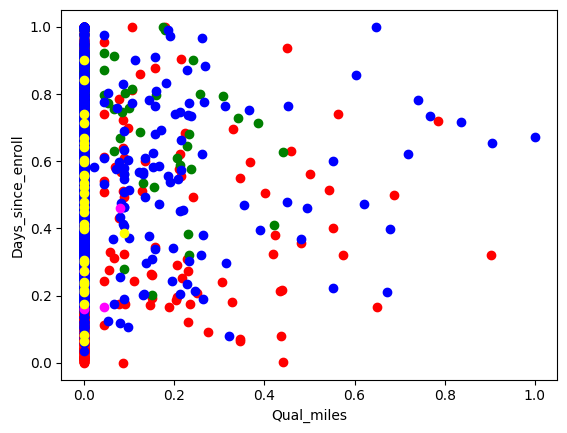

In [91]:

# create a figure using plt
figure = plt.figure()

colors = ['red', 'green', 'blue', 'magenta', 'yellow']
for index in range(len(colors)):
    plt.scatter(df['Qual_miles'][model.labels_ == index], df['Days_since_enroll'][model.labels_ == index], color=colors[index])

plt.xlabel('Qual_miles')
plt.ylabel('Days_since_enroll')

Text(0.5, 0.5, 'Days_since_enroll')

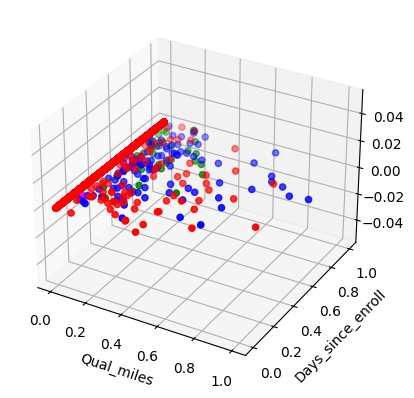

In [92]:
# create a figure using plt
figure = plt.figure()

# add a subplot
ax = figure.add_subplot(111, projection='3d')

colors = ['red', 'green', 'blue', 'magenta', 'yellow']
for index in range(len(colors)):
    ax.scatter(df['Qual_miles'][model.labels_ == index], df['Days_since_enroll'][model.labels_ == index], color=colors[index])

plt.xlabel('Qual_miles')
plt.ylabel('Days_since_enroll')

In [104]:
from sklearn.cluster import DBSCAN

# create an object of DBScan
model = DBSCAN(eps=0.2, min_samples=5)

# fit the data
model.fit(df)

DBSCAN(eps=0.2)

In [105]:
model.labels_

array([0, 0, 0, ..., 4, 0, 0])

Text(0, 0.5, 'Days_since_enroll')

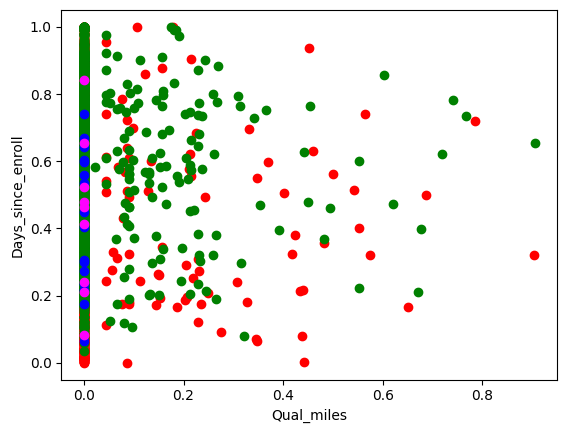

In [101]:
# create a figure using plt
figure = plt.figure()

# add a subplot
ax = figure.add_subplot(111)

colors = ['red', 'green', 'blue', 'magenta', 'yellow']
for index in range(len(colors)):
    ax.scatter(df['Qual_miles'][model.labels_ == index], df['Days_since_enroll'][model.labels_ == index], color=colors[index])

plt.xlabel('Qual_miles')
plt.ylabel('Days_since_enroll')